[[0.00000000e+00 2.01490142e+01 1.00000000e+00]
 [1.01010101e-02 1.99787227e+01 1.00000000e+00]
 [2.02020202e-02 2.02347106e+01 1.00000000e+00]
 [3.03030303e-02 2.05175150e+01 1.00000000e+00]
 [4.04040404e-02 2.00105621e+01 1.00000000e+00]
 [5.05050505e-02 2.00307690e+01 1.00000000e+00]
 [6.06060606e-02 2.05949760e+01 1.00000000e+00]
 [7.07070707e-02 2.03716446e+01 1.00000000e+00]
 [8.08080808e-02 2.00207738e+01 1.00000000e+00]
 [9.09090909e-02 2.03445862e+01 1.00000000e+00]
 [1.01010101e-01 2.00629949e+01 1.00000000e+00]
 [1.11111111e-01 2.00825033e+01 1.00000000e+00]
 [1.21212121e-01 2.03150129e+01 1.00000000e+00]
 [1.31313131e-01 1.96886422e+01 1.00000000e+00]
 [1.41414141e-01 1.97653529e+01 1.00000000e+00]
 [1.51515152e-01 2.01343440e+01 1.00000000e+00]
 [1.61616162e-01 2.00193830e+01 1.00000000e+00]
 [1.71717172e-01 2.04377085e+01 1.00000000e+00]
 [1.81818182e-01 2.00912291e+01 1.00000000e+00]
 [1.91919192e-01 1.99601473e+01 1.00000000e+00]
 [2.02020202e-01 2.08437350e+01 1.000000

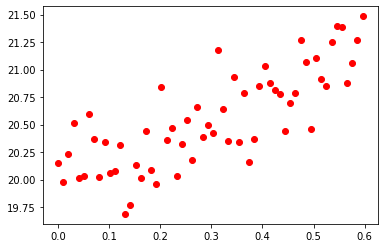

In [32]:
import csv
import numpy as np
from model import RegressionModel
from matplotlib import pyplot

def get_np_data_from_csv(filename):
    with open(f"{filename}.csv") as f:
        reader = csv.reader(f)
        next(reader) # skipping header info
        data = np.array([row[1:] for row in reader])
        # adding an intercept
        return np.append(data, [[1.0]] * len(data), axis=1).astype(float)

train_data = get_np_data_from_csv("lab_1_train")
print(train_data)

# selecting feature and intercept
train_x_vec = train_data[:,[0,2]]
train_y_vec = train_data[:, 1]

pyplot.plot(train_x_vec[:,[0]], train_y_vec, "ro")

In [33]:
LEARNING_RATE = 0.05
THRESHOLD = 0.000001
r = RegressionModel(LEARNING_RATE)
r.fit(train_x_vec, train_y_vec, THRESHOLD)

Epoch 1: wages - [0.83923163 1.76889702]. Loss - 384.2238844873549. Loss delta - 384.2238844873549.
Epoch 2: wages - [1.11706229 2.69542663]. Loss - 343.49561586664754. Loss delta - 40.728268620707354.
Epoch 3: wages - [1.37943004 3.57149036]. Loss - 307.090820513555. Loss delta - 36.40479535309254.
Epoch 4: wages - [1.62717909 4.39984189]. Loss - 274.5505288068315. Loss delta - 32.54029170672351.
Epoch 5: wages - [1.86110757 5.18308463]. Loss - 245.464494289153. Loss delta - 29.086034517678485.
Epoch 6: wages - [2.08197006 5.92367993]. Loss - 219.46602132749612. Loss delta - 25.998472961656887.
Epoch 7: wages - [2.29047996 6.62395484]. Loss - 196.227341857258. Loss delta - 23.23867947023811.
Epoch 8: wages - [2.48731175 7.28610942]. Loss - 175.45548292064527. Loss delta - 20.771858936612745.
Epoch 9: wages - [2.67310309 7.91222368]. Loss - 156.88857289773387. Loss delta - 18.5669100229114.
Epoch 10: wages - [2.84845685 8.50426412]. Loss - 140.29253985959042. Loss delta - 16.5960330381

In [34]:
test_data = get_np_data_from_csv("lab_1_test")
test_x_vec = test_data[:,[0,2]]
test_y_vec = test_data[:, 1]

print(f"Loss on test set - {r.test(test_x_vec, test_y_vec)}")

Loss on test set - 0.07370146876086507


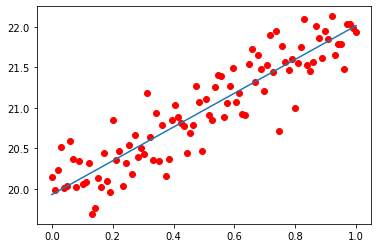

In [35]:
pyplot.plot(test_x_vec[:,[0]], test_y_vec, 'ro')
pyplot.plot(train_x_vec[:,[0]], train_y_vec, 'ro')

x, y = r.get_plot_coords(0, 1)
pyplot.plot(x, y)